## AutoViML: AutoViz & Auto_ViML Example & Instruction

Package Github: https://github.com/AutoViML

### Include basic usage of Auto_ViML package (AutoML and AutoVisualization)

In [36]:
## Load Basic Package 
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))
import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 
import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#misc libraries
import random
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

import os
print('\n'.join(os.listdir('../Autoviml project')))
# C:\Users\ADMIN\Desktop\Python\Autoviml project

Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.3
matplotlib version: 3.0.2
NumPy version: 1.17.4
SciPy version: 1.1.0
IPython version: 7.2.0
scikit-learn version: 0.20.1
-------------------------
.ipynb_checkpoints
analysisData.csv
area
AutoViML_showcase.ipynb
df_web.html
forestfires.csv
frame.html
hou_all.csv
MEDV
NYAirbnb_listings.csv
price
Survived
titanic_train.csv


## Part1: Regression Model
##### Continuous Target Variable Dataset: Forest Fires Data Set - Kaggle
p.s. the original Boston Housing dataset has been removed from UCI, so I used the one shared on Kaggle. Also, I would do some data wrangling to simplify the process.

https://www.kaggle.com/heptapod/uci-ml-datasets/data#

In [38]:
df_Regress = pd.read_csv('hou_all.csv')
print('Complete loading df!')

# Another way to look for this dataset
# from sklearn.datasets import load_boston
# df_dict = load_boston(return_X_y=False)
# X, y = load_boston(return_X_y=True)
# print(df_dict['DESCR'])

Complete loading df!


In [39]:
#Change the Column name
df_Regress = df_Regress.T.reset_index(drop=True).T
df_Regress.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV','bias_1']

#bias_1 is the column that added by other user at Kaggle, so I removed it from this dataset.
df_Regress = df_Regress.drop('bias_1', axis=1)
df_Regress.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [40]:
print(df_Regress.info())
print("-"*10)
print('Dataset Shape:\n', df_Regress.shape)
print("-"*10)
print('Dataset columns with null values:\n', df_Regress.isnull().sum())
# print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
CRIM       505 non-null float64
ZN         505 non-null float64
INDUS      505 non-null float64
CHAS       505 non-null float64
NOX        505 non-null float64
RM         505 non-null float64
AGE        505 non-null float64
DIS        505 non-null float64
RAD        505 non-null float64
TAX        505 non-null float64
PTRATIO    505 non-null float64
B          505 non-null float64
LSTAT      505 non-null float64
MEDV       505 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None
----------
Dataset Shape:
 (505, 14)
----------
Dataset columns with null values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [41]:
# Generating a whole new html page of the dataframe. Should open it through outside the notebook!
import webbrowser
df_Regress.head().to_html("df_web.html")
url = "http://localhost:8888/files/notebook/df_web.html"
# webbrowser.open(url,new=2)

### Check the target variable
The target variable is "MEDV" (Median value of owner-occupied homes in $1000's)

p.s. If you are interested in each variable, look into the Kaggle page.

In [42]:
target_variable_name = 'MEDV'
type(df_Regress[target_variable_name][0])

# This is for changing the data type in some cases.
# df_Regress[target_variable_name] = df_Regress[target_variable_name].replace('[^.0-9]', '', regex=True).astype(float)

numpy.float64

(array([ 21.,  55.,  82., 154.,  83.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

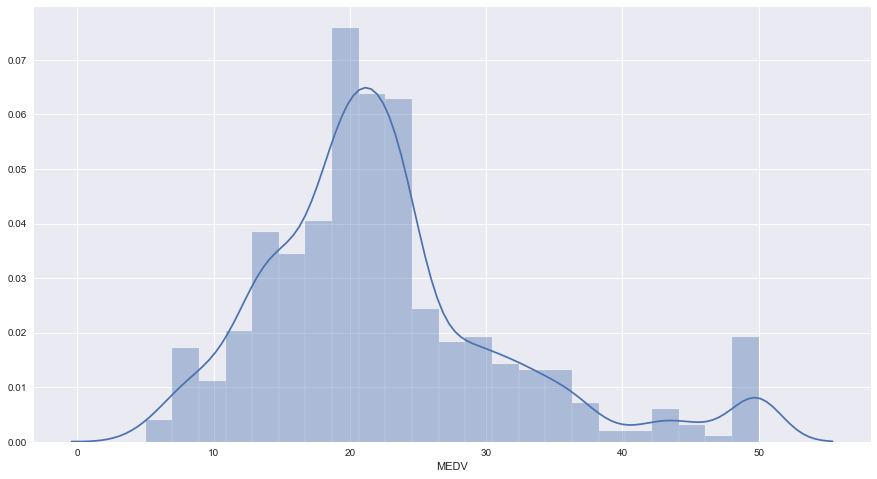

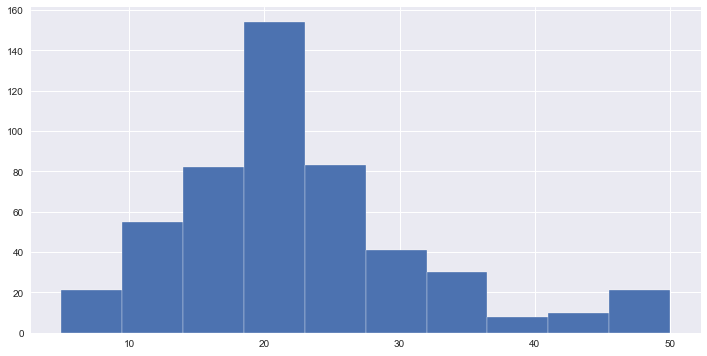

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df_Regress[target_variable_name])
plt.figure(figsize=(10,5))
plt.hist(x=df_Regress[target_variable_name])

### Regression Dataset: AutoViz - Auto Visualization Part 

In [46]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (505, 14)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 66
No categorical or boolean vars in data set. Hence no bar charts.
Nothing to add Plot not being added
All Plots done
Time to run AutoViz (in seconds) = 10.112


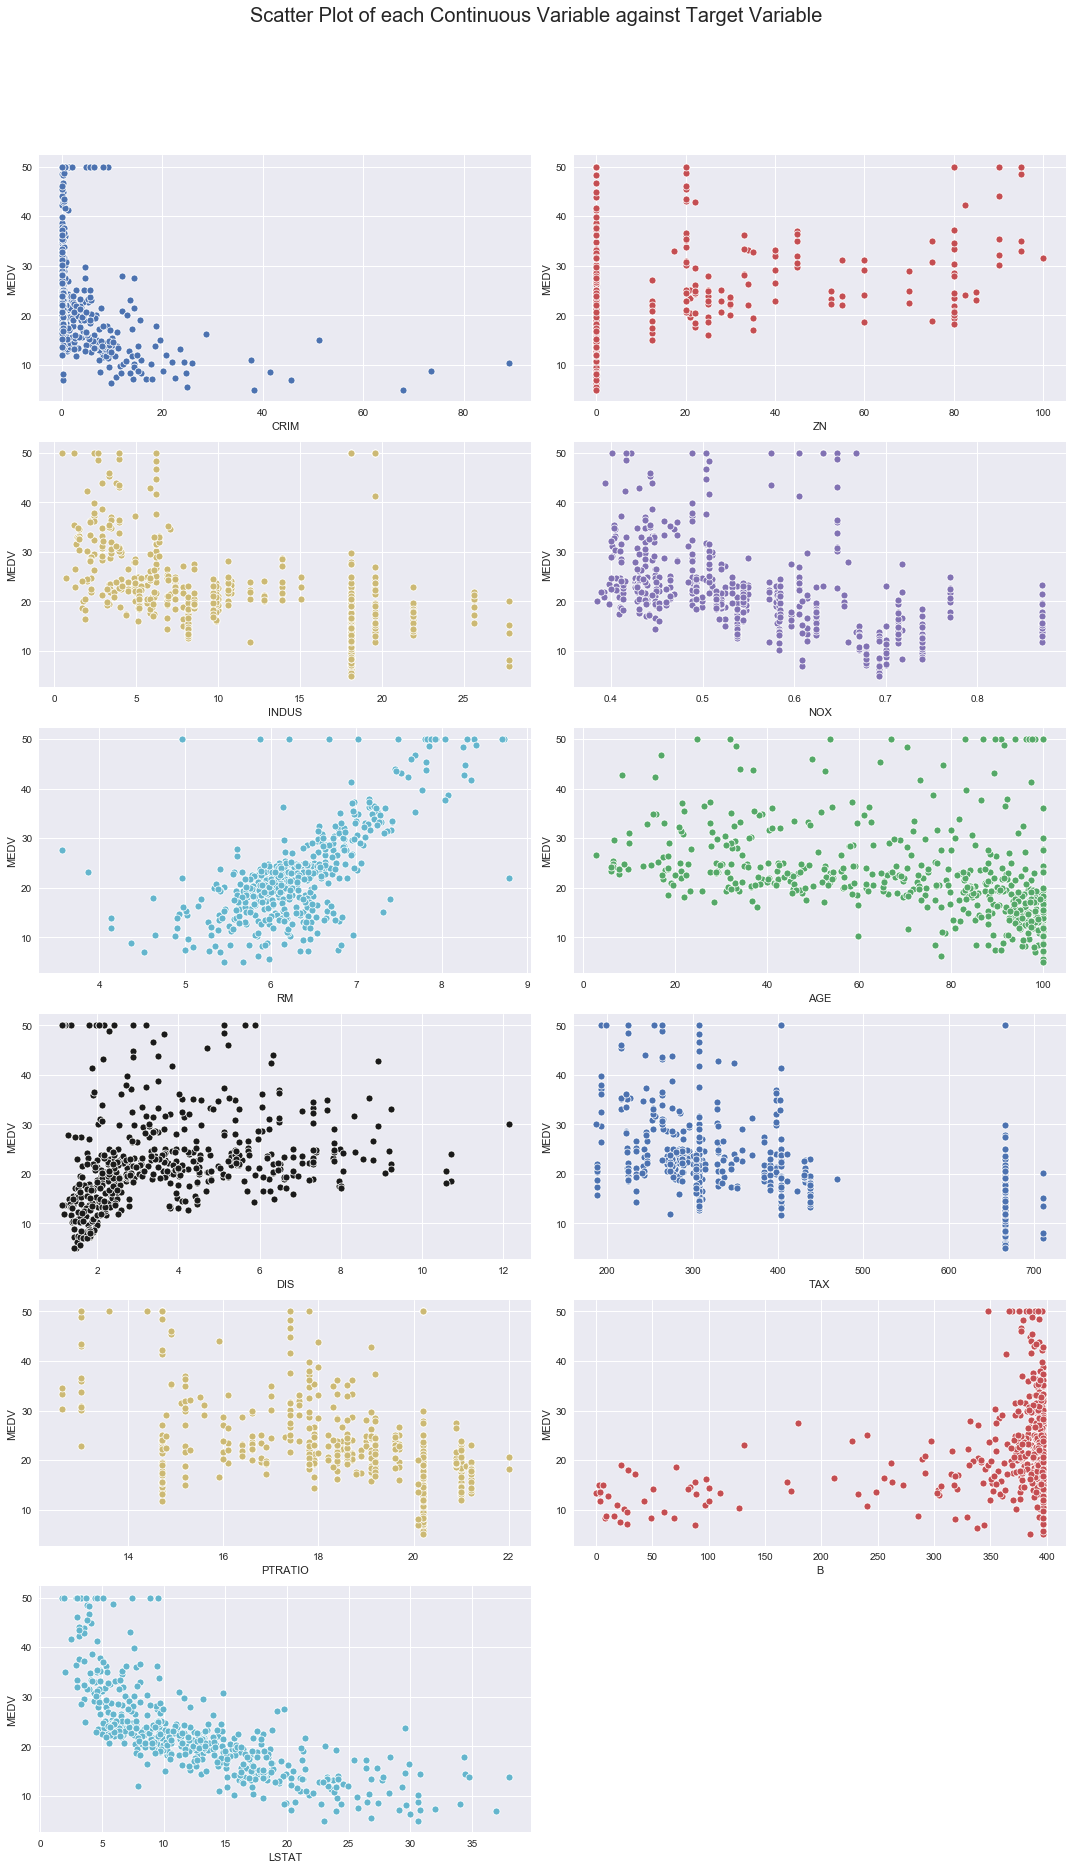

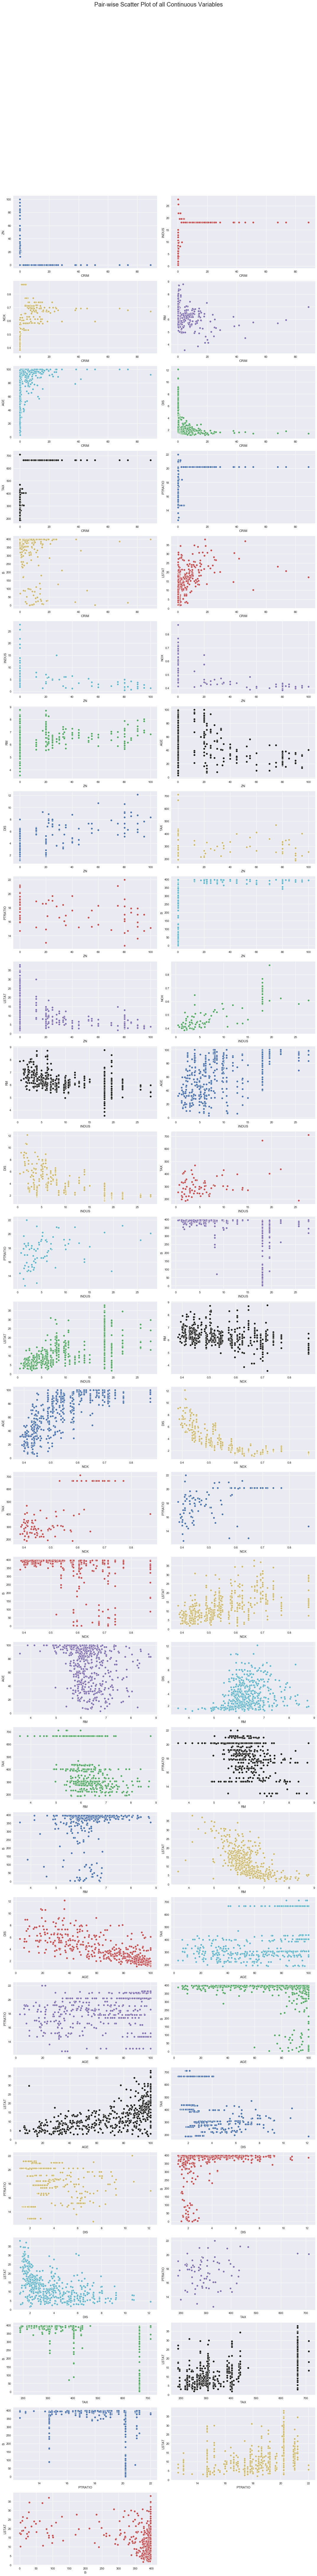

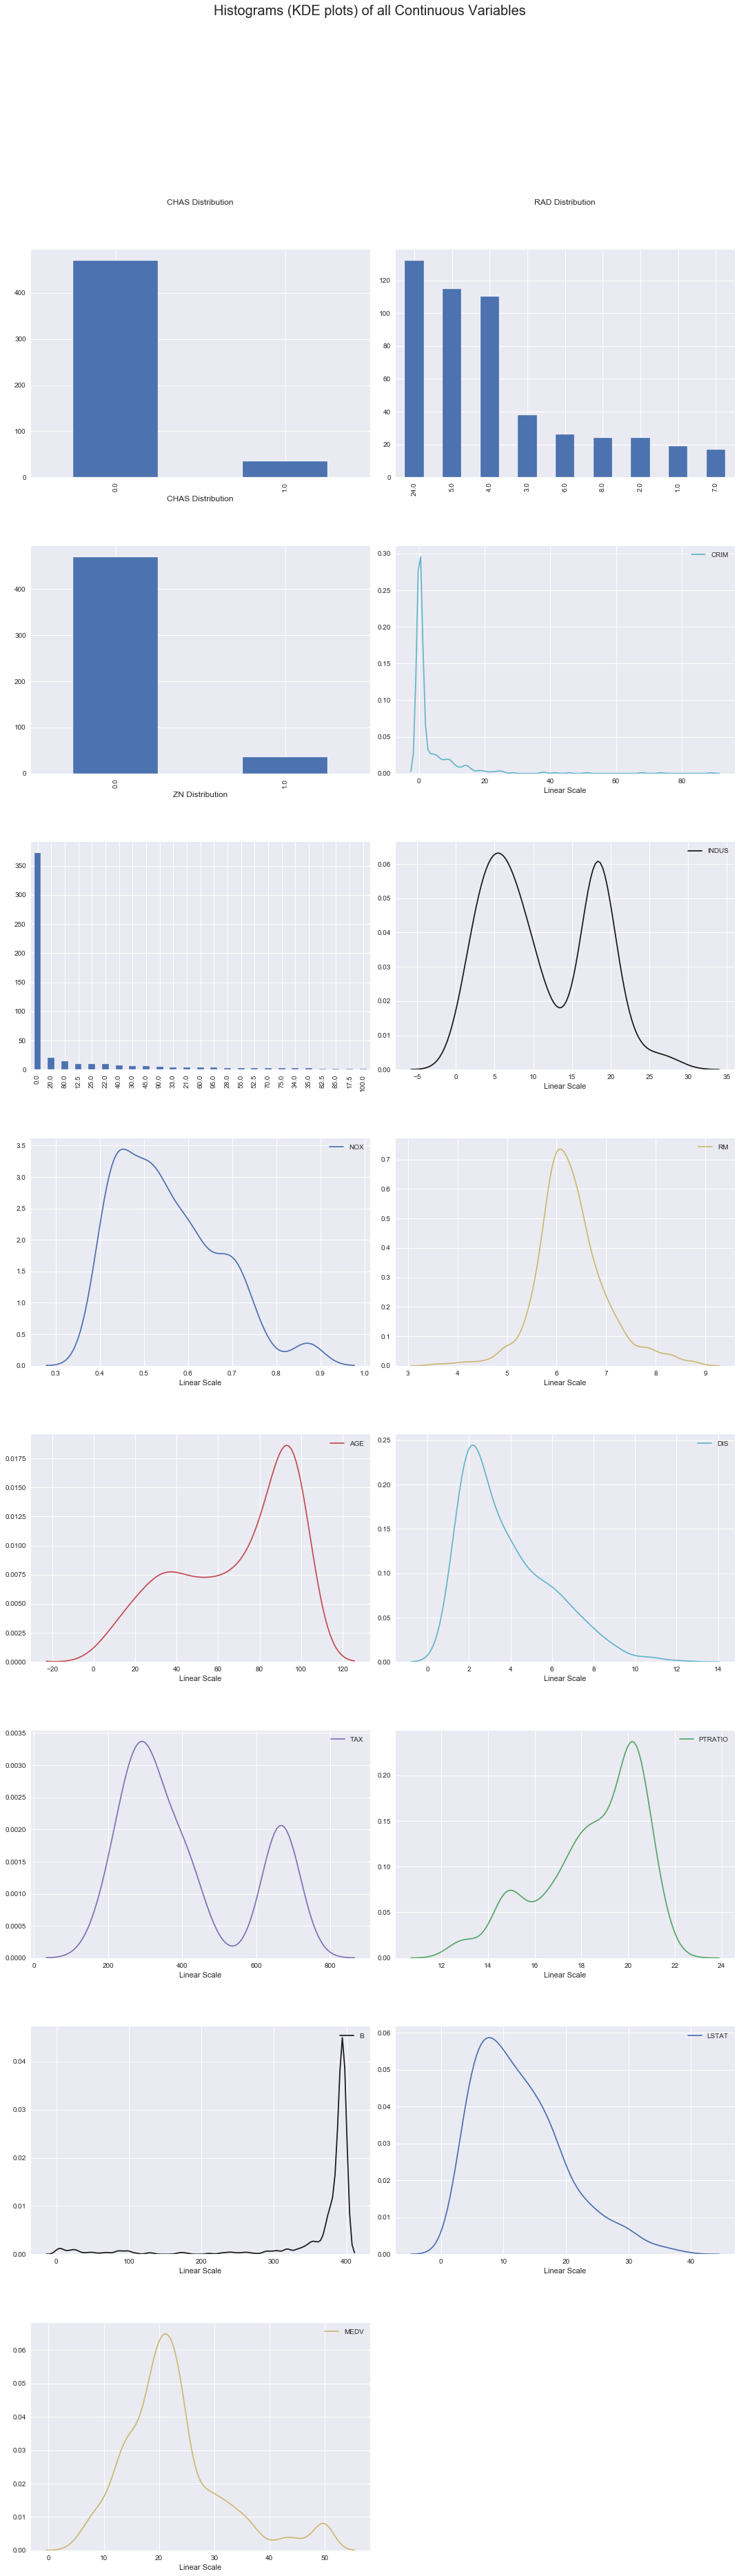

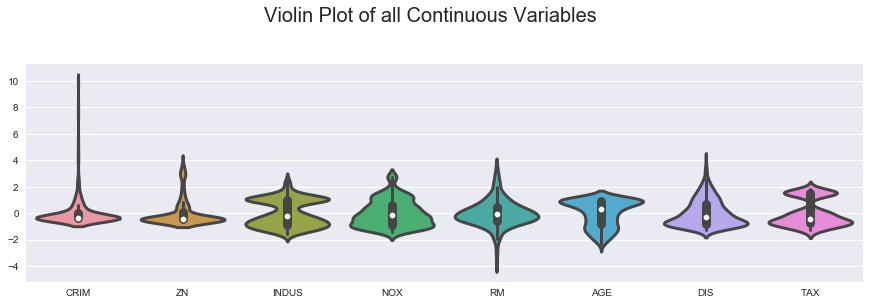

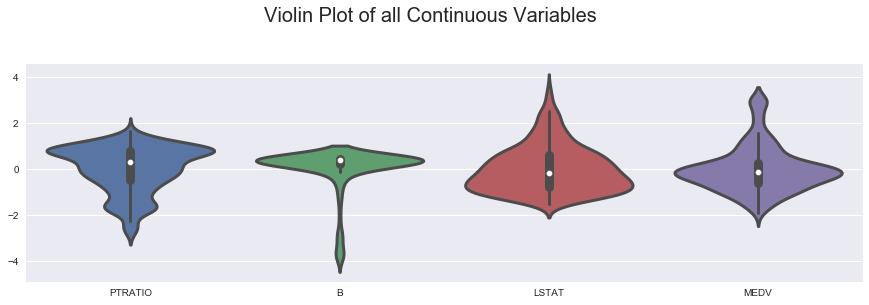

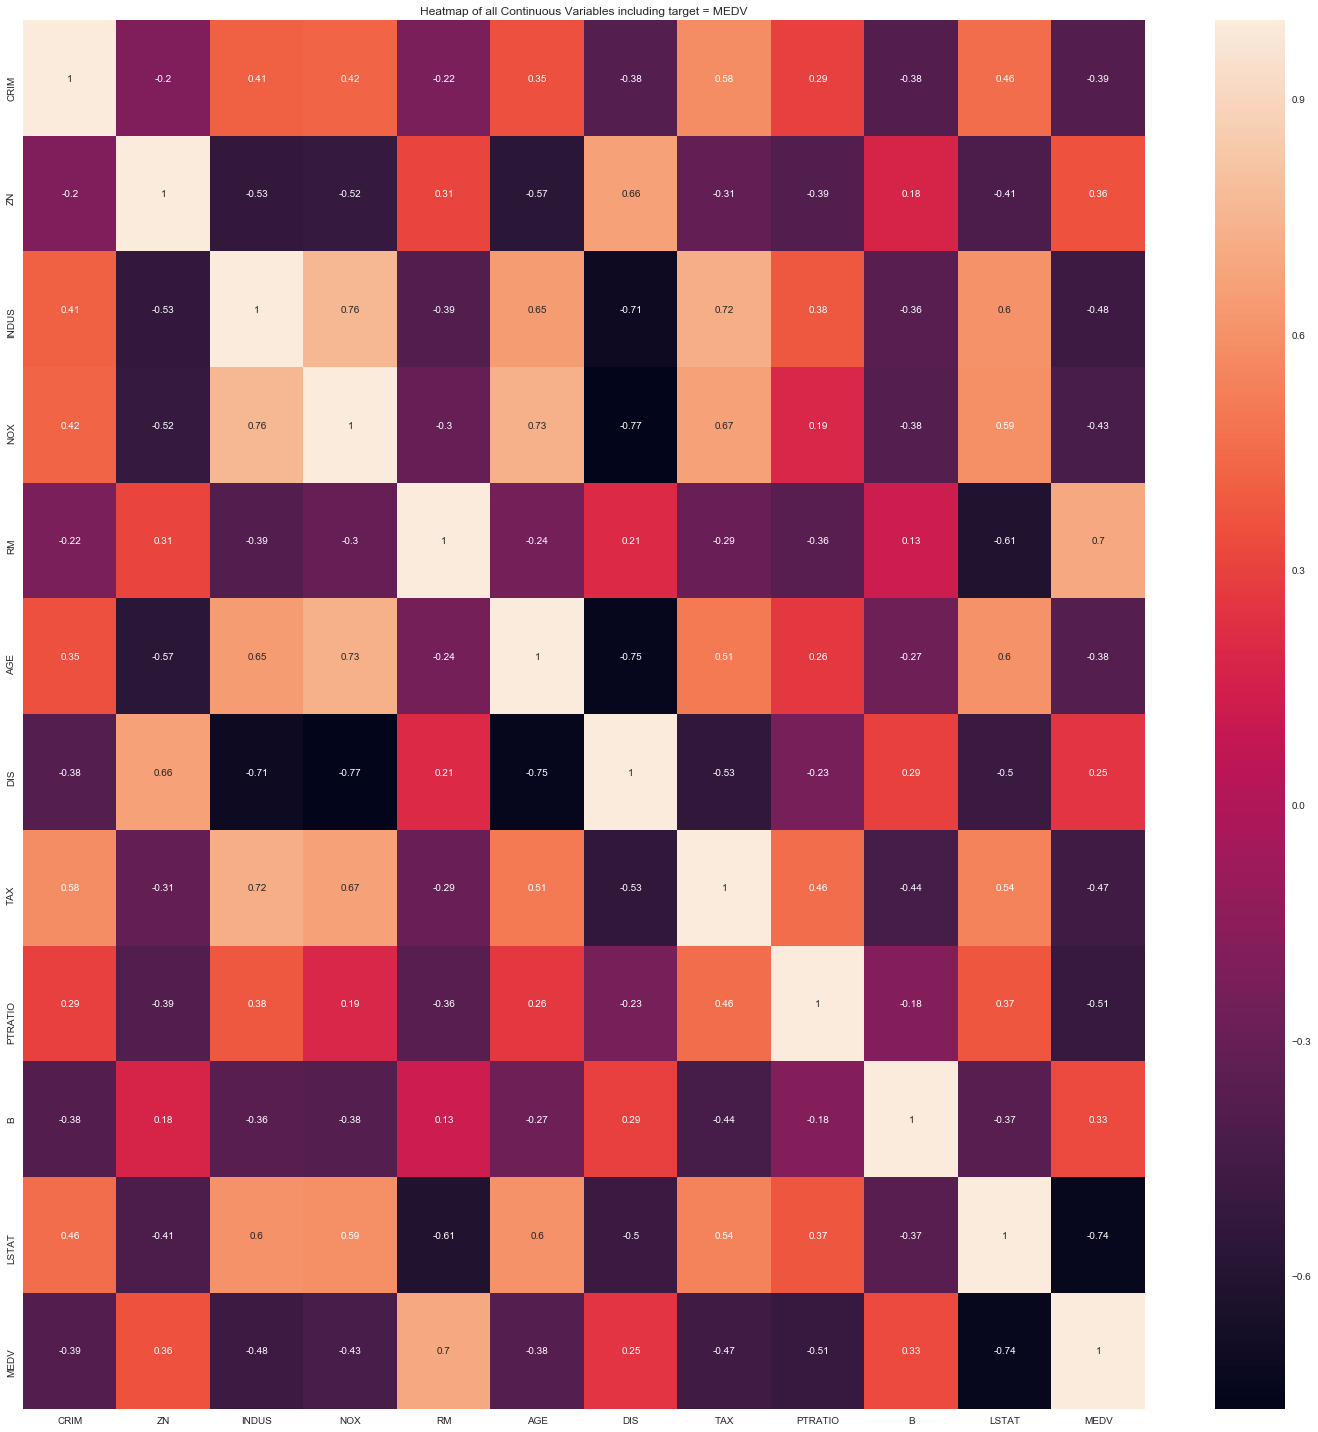

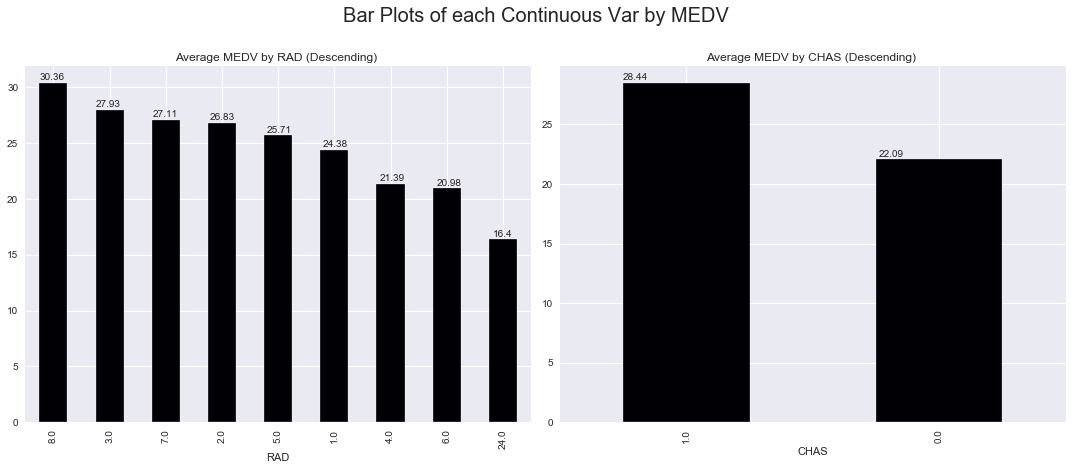

In [47]:
##
sep = '/'
dft = AV.AutoViz('', ',', target_variable_name, df_Regress)

### Regression Dataset: Auto_ViML - AutoML part


In [24]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.468. Call using: 
             m, feats, trainm, testm = Auto_ViML(train, target, test, 
                                    sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False, 
                                    verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'


In [25]:
from sklearn import model_selection
train_X, test_X, train_y, test_y = model_selection.train_test_split(df_Regress.drop(target_variable_name, axis = 1), df_Regress[target_variable_name], test_size=0.3, random_state = 10)

# generate the train and test data suitable for this package
train = train_X.copy()
train[target_variable_name] = train_y
test = test_X.copy()
test[target_variable_name] = test_y

# another approach
# num = int(0.7*df_Regress.shape[0])
# train = df_Regress[:num]
# test = df_Regress[num:]
# df2.head()

Train (Size: 353,14) has Single_Label with target: ['MEDV']
"
 ################### Regression  ######################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Test data has no missing values...
Number of numeric variables = 13
    Number of variables removed due to high correlation = 4 
    Feature Selection begins: currently 9 predictors

Data Ready for Modeling with MEDV as Target...
Lin

<Figure size 720x432 with 0 Axes>

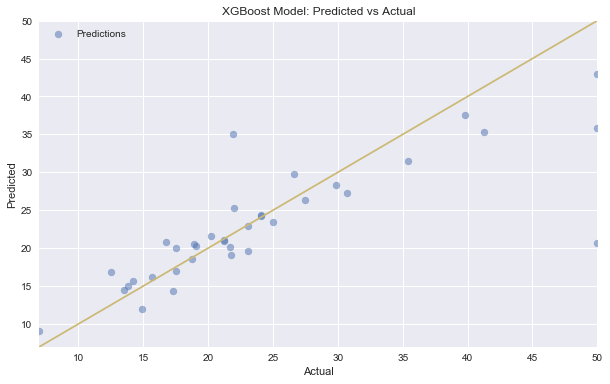

    MAE = 3.5248
    MAPE = 13%
    RMSE = 6.4087
    MAE as % std dev of Actuals = 33.4%
    Normalized RMSE (% of MinMax of Actuals) = 15%
    Normalized RMSE (% of Std Dev of Actuals) = 61%
    Time taken for Ensembling: 1.5 seconds
########################################################
Completed Ensemble predictions on held out data


<Figure size 720x432 with 0 Axes>

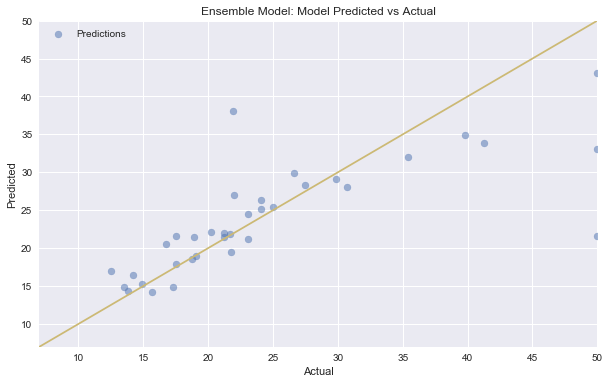

    MAE = 3.8423
    MAPE = 15%
    RMSE = 6.7853
    MAE as % std dev of Actuals = 36.5%
    Normalized RMSE (% of MinMax of Actuals) = 16%
    Normalized RMSE (% of Std Dev of Actuals) = 64%
After multiple models, Ensemble Model Results:
    RMSE Score = 5.3

Ensembling Models is better than Single Model for this data set.


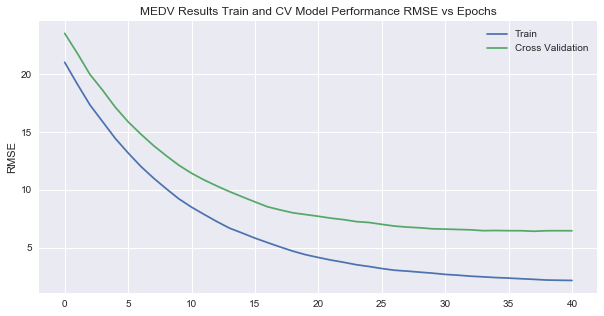

    Time taken for this Target (in seconds) = 80
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
[10:04:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Training time taken in seconds = 0
########################################################
Completed Ensemble predictions on held out data
    Saving predictions to .\MEDV\MEDV_Regression_test_modified.csv
    Saving predictions to .\MEDV\MEDV_Regression_submission.csv
    Saving predictions to .\MEDV\MEDV_Regression_train_modified.csv
Time Taken in mins = 1.4 for the Entire Process


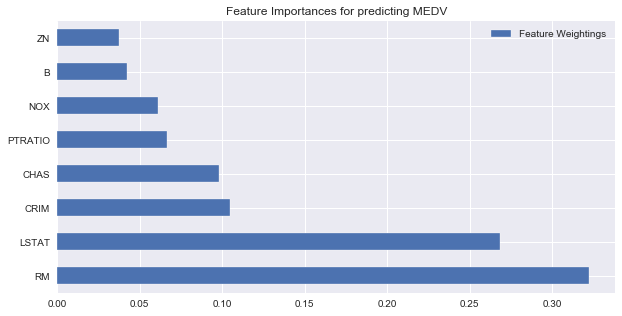

In [26]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
sample_submission=''
scoring_parameter = 'balanced-accuracy'

m, feats, trainm, testm = Auto_ViML(train, target_variable_name, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)                      
# run over 1hr!!

## Part2: Classification Model
##### Catogorical Target Variable Dataset: Titanic  - Kaggle

https://www.kaggle.com/heptapod/uci-ml-datasets/data#

In [48]:
df_Class = pd.read_csv('titanic_train.csv')

print(df_Class.info())
print("-"*10)
print('Dataset Shape:\n', df_Class.shape)
print("-"*10)
print('Dataset columns with null values:\n', df_Class.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------
Dataset Shape:
 (891, 12)
----------
Dataset columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [49]:
# Generating a whole new html page of the dataframe. Should open it through outside the notebook!
import webbrowser
df_Class.head().to_html("df_web.html")
url = "http://localhost:8888/files/notebook/df_web.html"
# webbrowser.open(url,new=2)

### Check the target variable
The target variable is "MEDV" (Median value of owner-occupied homes in $1000's)

p.s. If you are interested in each variable, look into the Kaggle page.

In [50]:
target_variable_name = 'Survived'
type(df_Class[target_variable_name][0])

numpy.int64

Total Observations: 342
   Count  Percentage
0    549      0.6162
1    342      0.3838


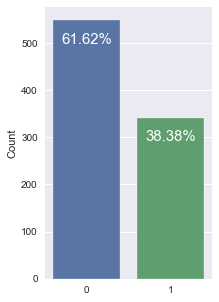

In [133]:

target_sum = pd.DataFrame([df_Class[target_variable_name].value_counts(),
               round(df_Class[target_variable_name].value_counts()/sum(df_Class[target_variable_name].value_counts()), 4)],
              index=['Count','Percentage']).T
print('Total Observations:', sum(df_Class[target_variable_name]))
print(target_sum.astype({"Count": int}))

fig = plt.figure(figsize=[3,5])
ax = sns.barplot(y="Count", x=['0','1'], data=target_sum)

for p, i in zip(ax.patches, [0,1]):
    percent = target_sum['Percentage'][i]
    ax.annotate('{:.2f}%'. format(percent*100), (p.get_x()+0.4, p.get_height()-50), ha='center', size=15, color='white')

### Classification Dataset: AutoViz - Auto Visualization Part 

In [134]:
### AutoViz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    11 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Total Number of Scatter Plots = 3
Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 1.554


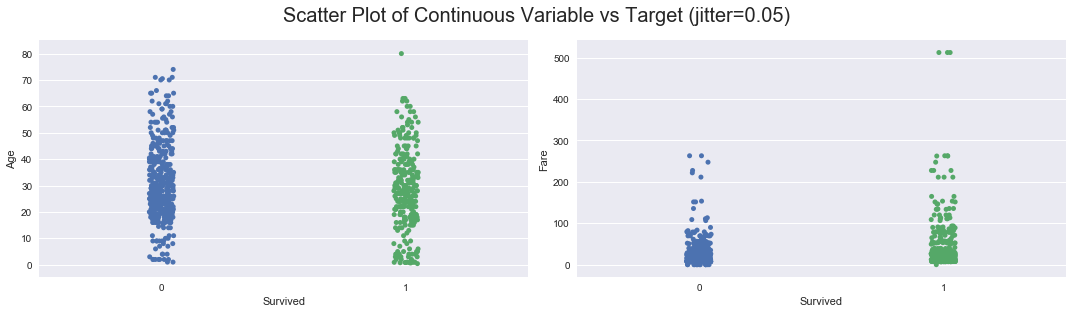

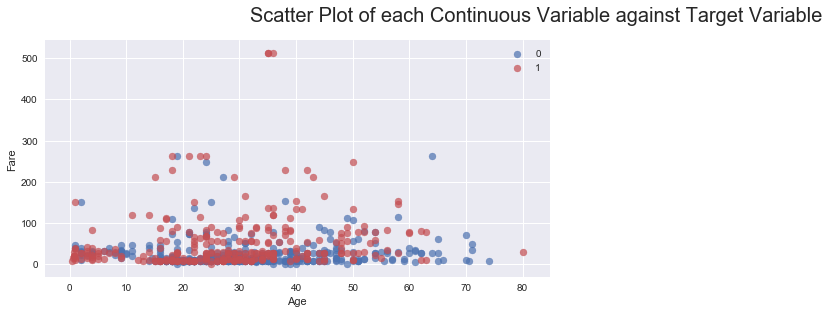

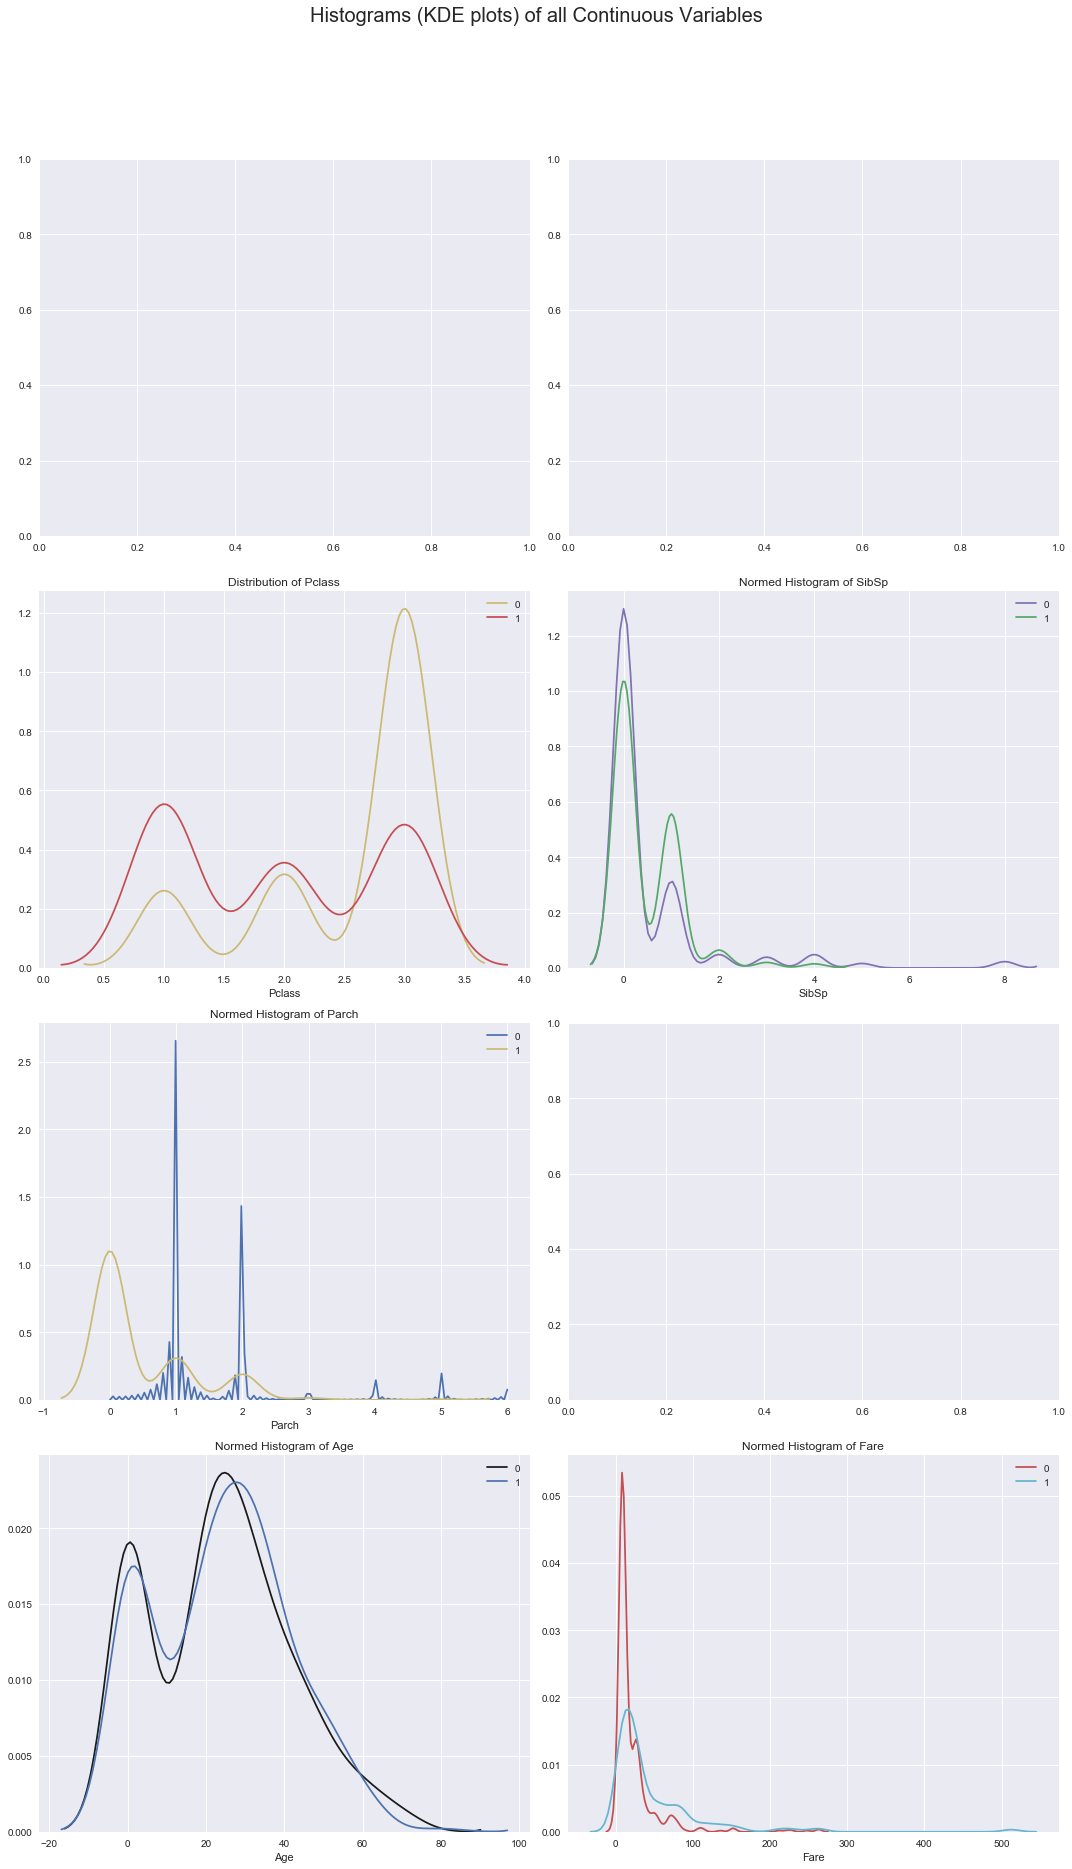

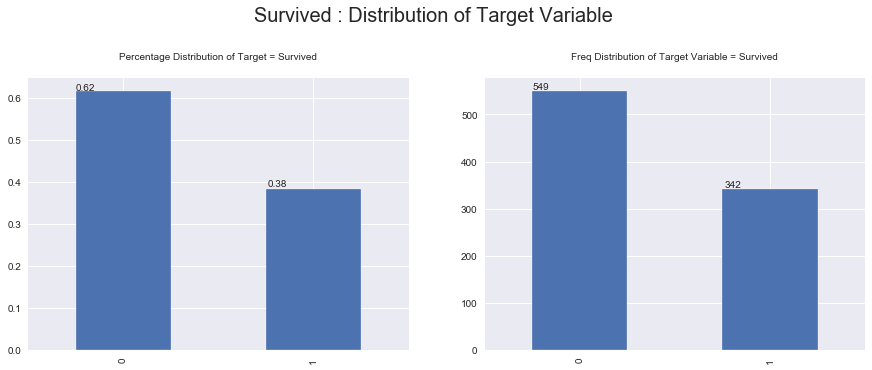

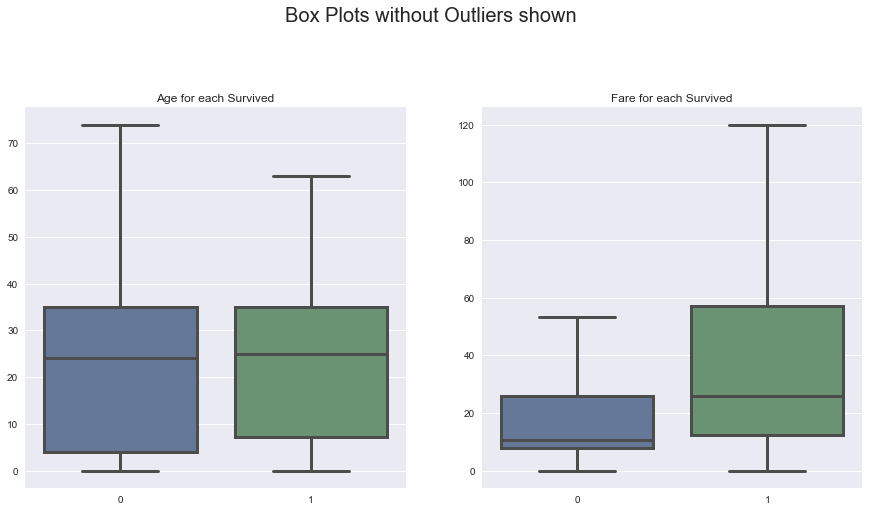

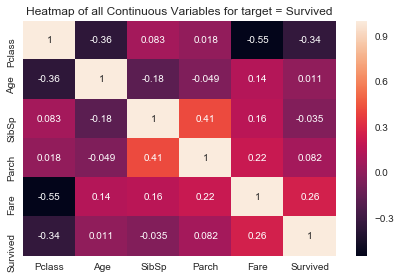

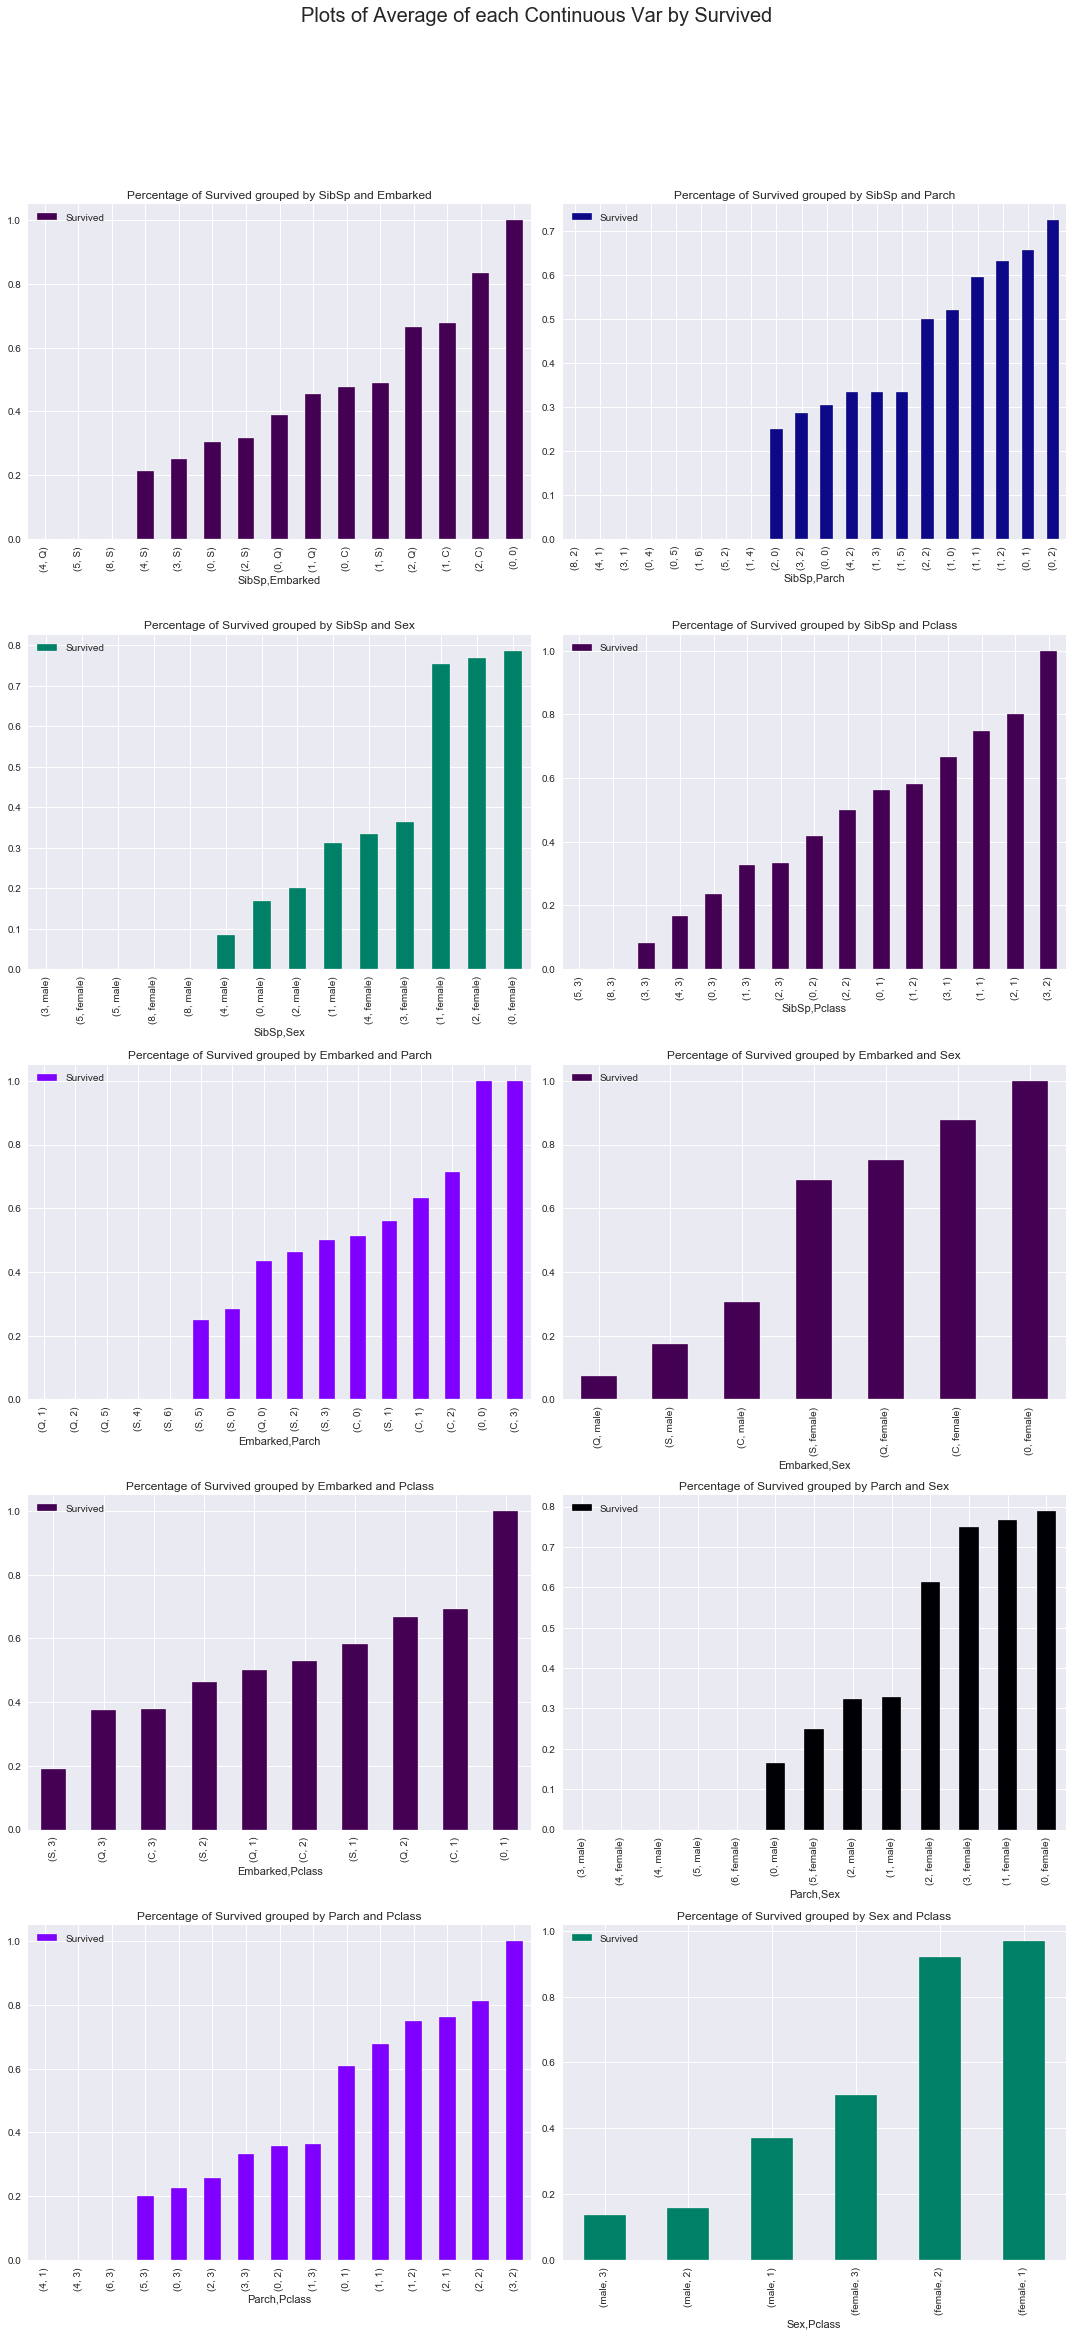

In [136]:
##
sep = '/'
dft = AV.AutoViz('', ',', target_variable_name, df_Class)

### Classification Dataset: Auto_ViML - AutoML part


In [137]:
from autoviml.Auto_ViML import Auto_ViML

In [138]:
from sklearn import model_selection
train_X, test_X, train_y, test_y = model_selection.train_test_split(df_Class.drop(target_variable_name, axis = 1), df_Class[target_variable_name], test_size=0.3, random_state = 10)

# generate the train and test data suitable for this package
train = train_X.copy()
train[target_variable_name] = train_y
test = test_X.copy()
test[target_variable_name] = test_y

# another approach
# num = int(0.7*df_Regress.shape[0])
# train = df_Regress[:num]
# test = df_Regress[num:]
# df2.head()

Train (Size: 623,12) has Single_Label with target: ['Survived']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     0:     375  ->   60.2%
     1:     248  ->   39.8%
Selecting Binary_Classification Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target Survived is already numeric. No transformation done.
    Top columns in Train with missing values: ['Cabin', 'Age', 'Embarked']
         and their missing value totals: [477, 113, 2]
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of 

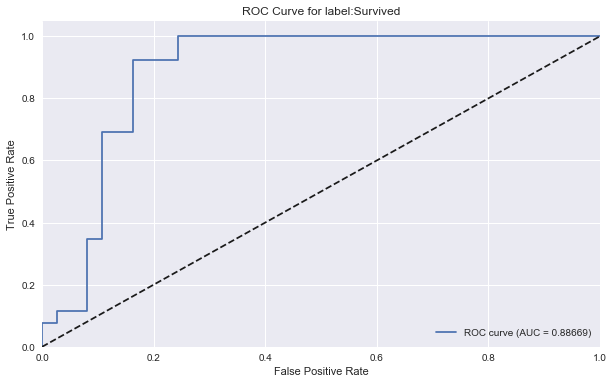

Average precision-recall score: 0.74
Macro F1 score, averaged over all classes: 0.70


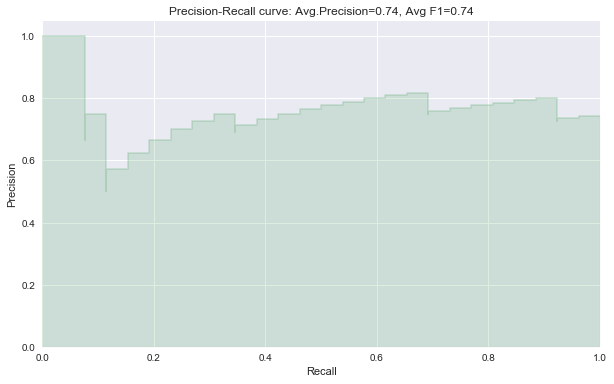

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 79.782%
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.79      0.73      0.76        26

   micro avg       0.81      0.81      0.81        63
   macro avg       0.81      0.80      0.80        63
weighted avg       0.81      0.81      0.81        63

[[32  5]
 [ 7 19]]

Ensembling Models is better than Single Model for this data set.


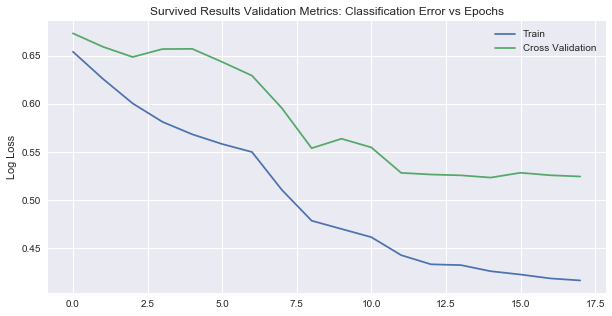

    Time taken for this Target (in seconds) = 69
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
Model Training time taken in seconds = 0
Test Data predictions using Threshold = 0.5
    Saving predictions to .\Survived\Survived_Binary_Classification_test_modified.csv
    Saving predictions to .\Survived\Survived_Binary_Classification_submission.csv
    Saving predictions to .\Survived\Survived_Binary_Classification_train_modified.csv
Time Taken in mins = 1.2 for the Entire Process


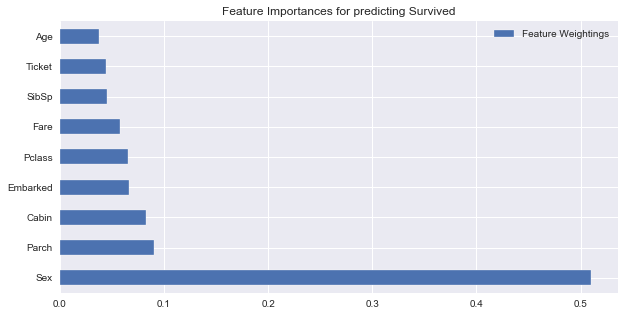

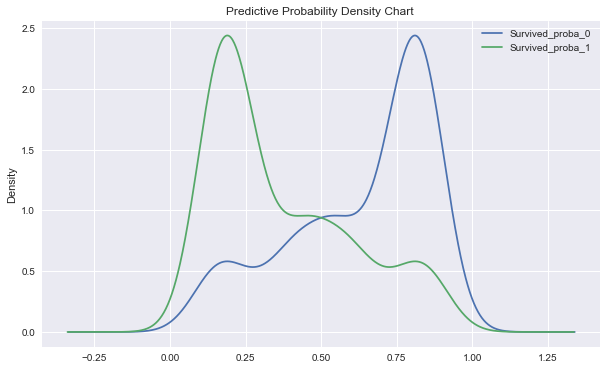

In [139]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
sample_submission=''
scoring_parameter = 'balanced-accuracy'

m, feats, trainm, testm = Auto_ViML(train, target_variable_name, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)                      
# run over 1hr!!

In [140]:
######## Use this to Test Classification Problems Only ####

modelname='XGBoost'
def accu(results, y_cv):
    return (results==y_cv).astype(int).sum(axis=0)/(y_cv.shape[0])
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
    print('\nBalanced Accuracy = %0.2f%%\n' %(100*balanced_accuracy_score(test[target].values, testm[target+'_'+modelname+'_predictions'].values)))
    print(classification_report(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
except:
    print('No target variable present in test data. No results')

Test results since target variable is present in test data:
No target variable present in test data. No results


In [ ]:
#### Use this to Test Regression Problems Only #####

import numpy as np
def rmse(results, y_cv):
    return np.sqrt(np.mean((results - y_cv)**2, axis=0))
from autoviml.Auto_ViML import print_regression_model_stats

####################
modelname='Linear'
print(rmse(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
# print_regression_model_stats(test[target].values,testm[target+'_'+modelname+'_predictions'].values)